---

_This notebook has been modified from the **version 1.0** of the cousera course 'Applied Machine Learning in Python
Applied Machine Learning in Python, University of Michigan'. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

### Content

* [Examining Data Set](#exa)
* [K-Nearest Neighbors Classification](#KNN)
    * Train the classifier (fit the estimator) using the training data.
    * Estimate the accuracy of the classifier on future data, using the test data.
    * Use the trained k-NN classifier model to classify new, previously unseen objects.
    * [Plot decision boundaries.](#boundaries)
    * [How sensitive is k-NN classification accuracy to the train/test split proportion?](#accur)

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [1]:
%matplotlib notebook
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import scipy.stats as sps
sns.set(style='whitegrid')

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
fruits.shape

(59, 7)

In [6]:
features = fruits.columns[-4:].tolist()

In [7]:
features

['mass', 'width', 'height', 'color_score']

<img src="Colour_source.png" alt="jupyter" style="width: 500px;"/> 

In [8]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
# Creating a tuple to know the unique tipe label and fruit
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

<a id="exa"></a> 
### Examining the data

<IPython.core.display.Javascript object>


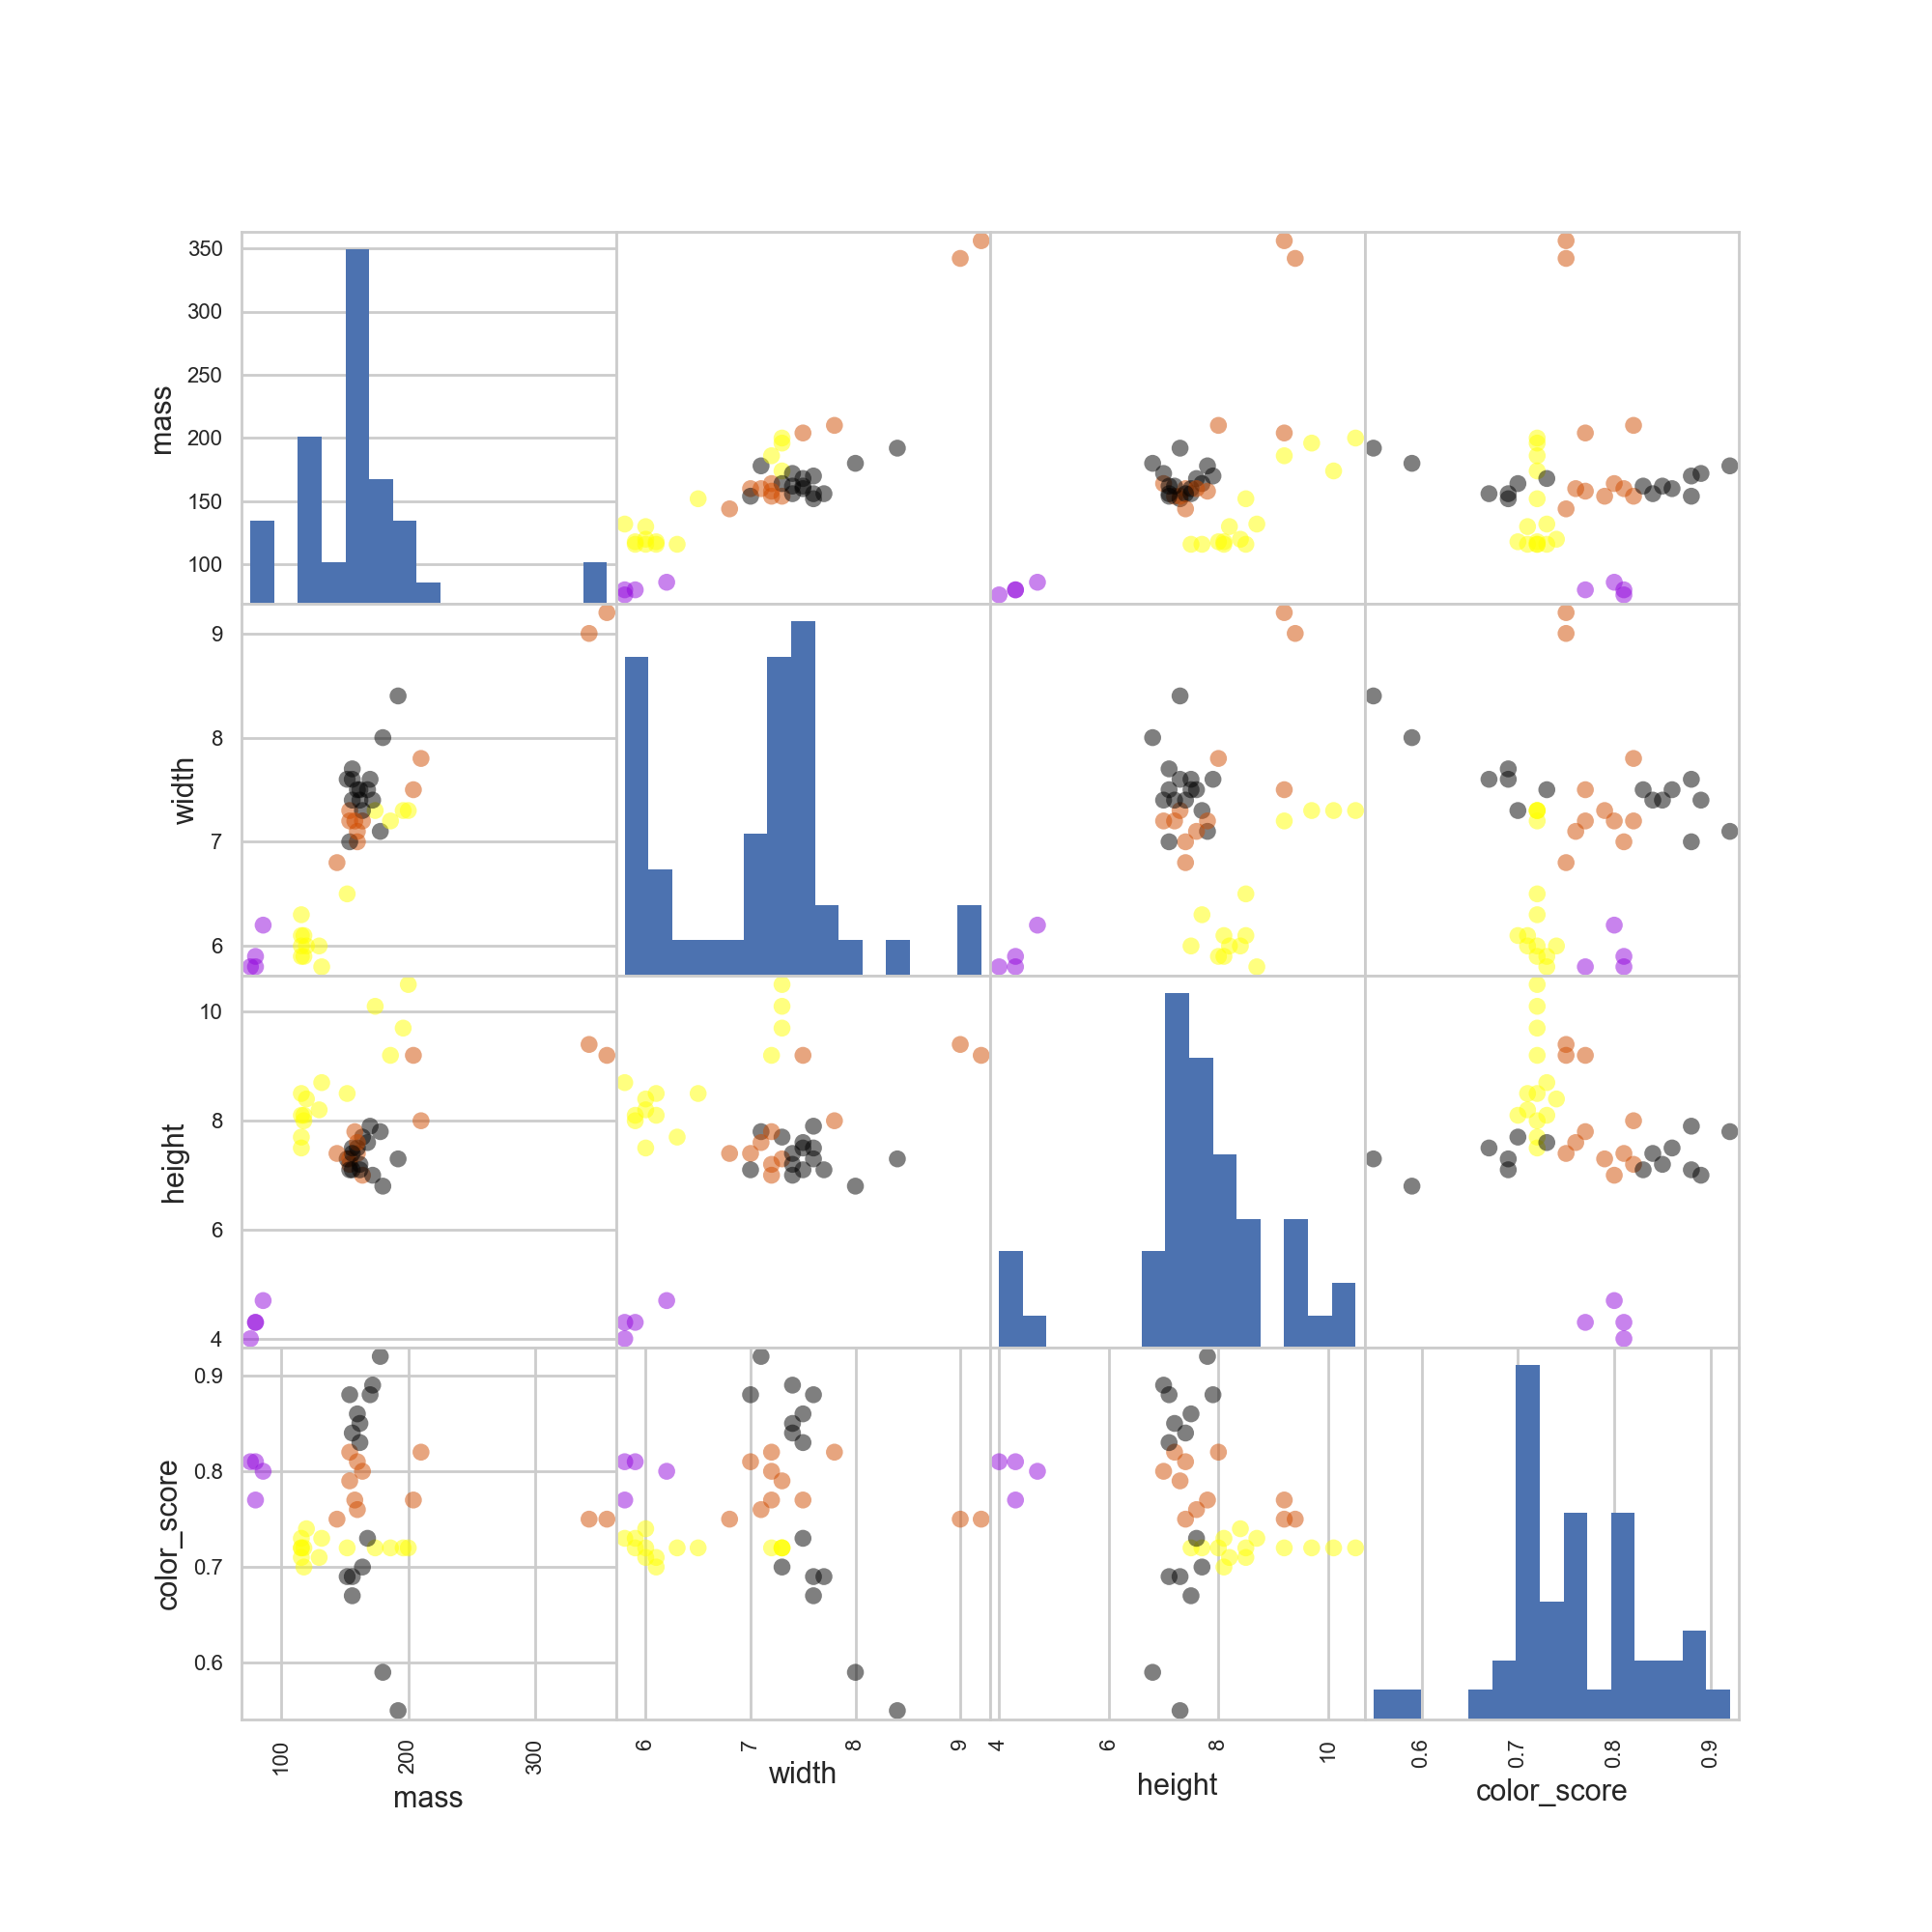

In [10]:
# plotting a scatter matrix
# importing colour map
from matplotlib import cm

X = fruits[features]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,10), cmap=cmap)

In [11]:
df_train = pd.concat([X_train, y_train],axis= 1)
df_train.head()

,mass,width,height,color_score,fruit_label
42,154,7.2,7.2,0.82,3
48,174,7.3,10.1,0.72,4
7,76,5.8,4.0,0.81,2
14,152,7.6,7.3,0.69,1
32,164,7.2,7.0,0.80,3


In [12]:
df_train.shape

(44, 5)

In [13]:
df_train['width'].max()

9.1999999999999993

In [174]:
df_train['width'].min()

5.7999999999999998

In [56]:
def corrfunc(x, y, **kws):
    (r, p) = sps.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

(3.5, 11.0)

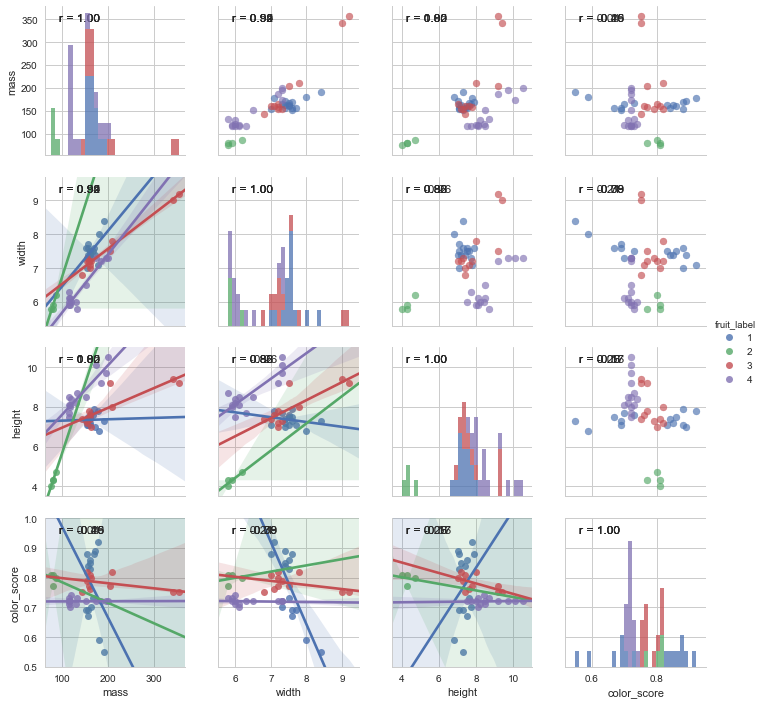

In [94]:
# Other way to generate the same type of plot
fig = sns.PairGrid(df_train, hue='fruit_label', vars=features)
fig = fig.map_diag(plt.hist, bins=30, alpha=0.75)
fig = fig.map_upper(plt.scatter, alpha=0.65)
fig = fig.map_lower(sns.regplot)
fig = fig.add_legend()
fig = fig.map(corrfunc)
# Get hold of the axes objects (an array of axes)
axes = fig.axes
axes[3, 0].set_ylim(0.50, 1.0)
axes[1, 0].set_ylim(df_train['width'].min() - 0.5, df_train['width'].max() + 0.5)
axes[2, 0].set_ylim(df_train['height'].min() - 0.5, df_train['height'].max() + 0.5)

<IPython.core.display.Javascript object>


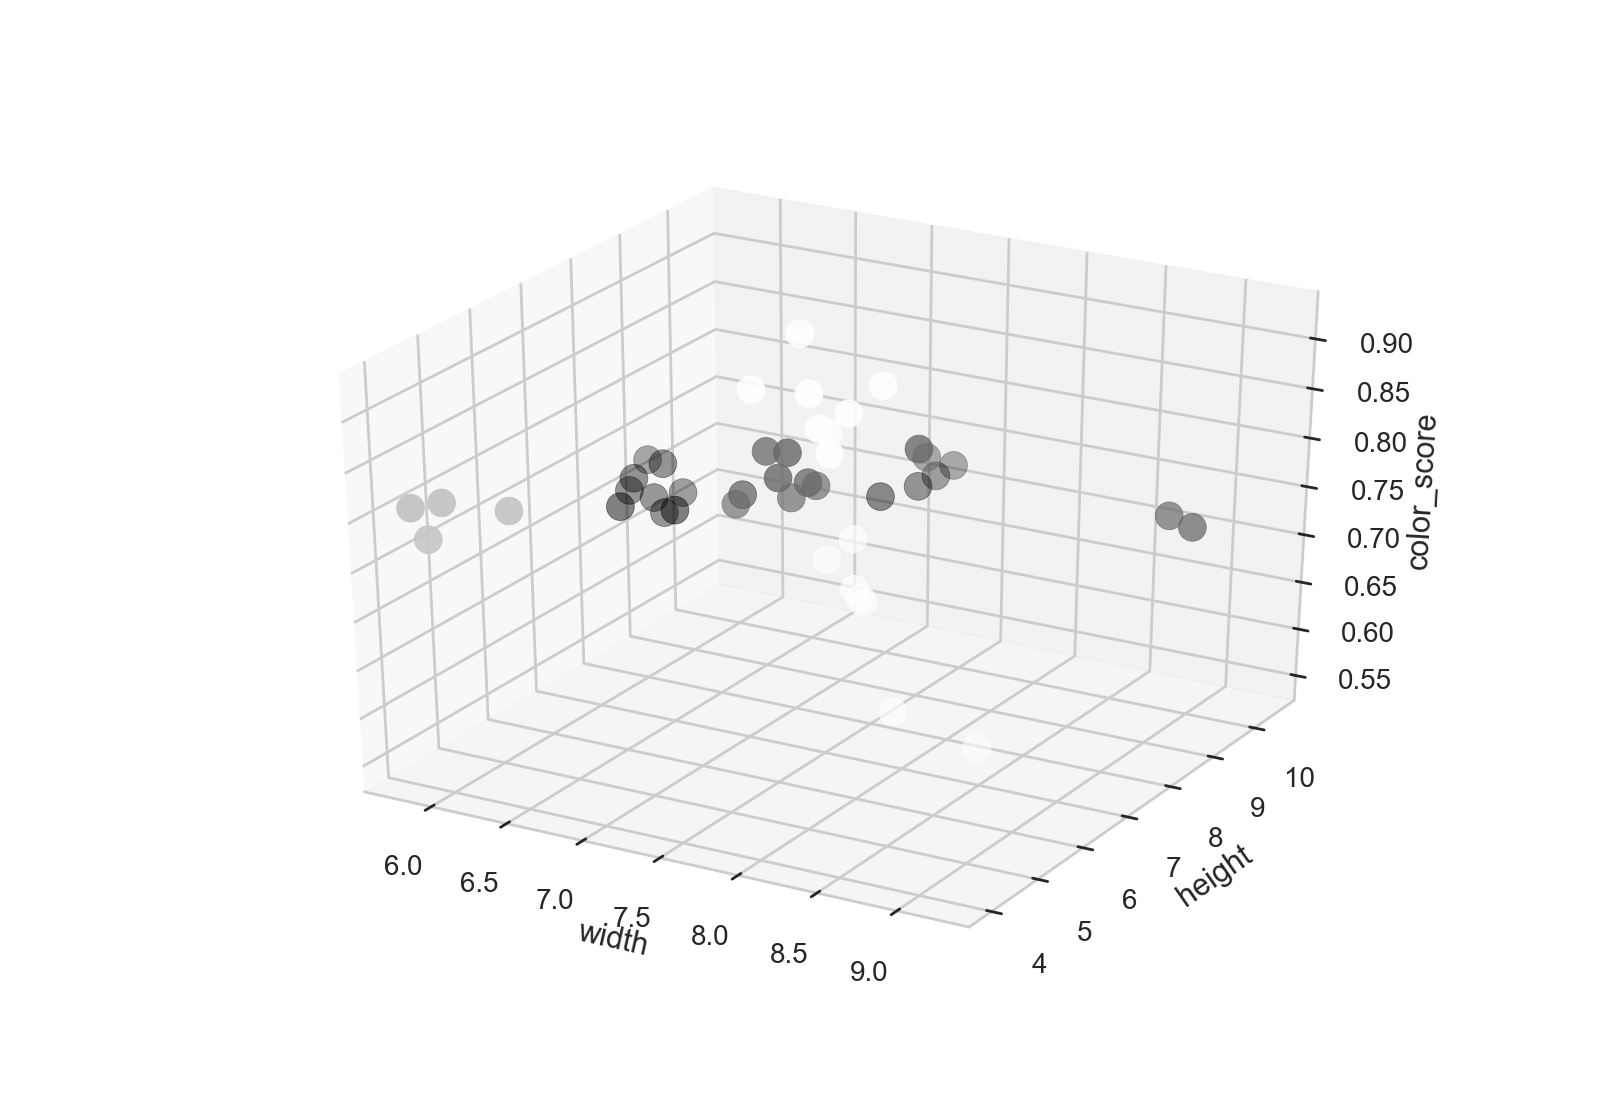

In [99]:
# plotting a 3D scatter plot
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html
from mpl_toolkits.mplot3d import Axes3D

figthree = plt.figure()
ax = figthree.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

<img src="Data_split.png" alt="jupyter" style="width: 900px;"/> 

In [14]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
# If we want to keep the same split the value of 'random_state' should be kept the same
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
X_train.head()

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0


In [16]:
X_train.shape

(44, 3)

<img src="Data_split_porp.png" alt="jupyter" style="width: 900px;"/> 

<a id="KNN"></a> 
### Create classifier object

<img src="KNN_explanation.png" alt="jupyter" style="width: 600px;"/>
<img src="KNN_explanation_2.png" alt="jupyter" style="width: 600px;"/> 
<img src="KNN_explanation_3.png" alt="jupyter" style="width: 600px;"/> 
<img src="KNN_explanation_4.png" alt="jupyter" style="width: 600px;"/> 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# instance of the classifier
knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [20]:
# accurracy = TP + TN / (TP + TN + FP +FN): Fraction of items on the test_set whose ture label was accurately 
# predicted by the classifier
knn.score(X_test, y_test)

0.53333333333333333

In [21]:
X_test.head()

,mass,width,height
26,362,9.6,9.2
35,150,7.1,7.9
43,194,7.2,10.3
28,140,6.7,7.1
11,172,7.1,7.6


In [22]:
# Checking prediction
predict = knn.predict(X_test)

In [23]:
predict

array([3, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 1, 3, 1, 4])

In [24]:
from sklearn.metrics import accuracy_score
# evaluate accuracy
print(accuracy_score(y_test, predict))

0.533333333333


### Use the trained k-NN classifier model to classify new, previously unseen objects

In [132]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm, and 0.92 colore
example_case = [[20, 4.3, 5.5, 0.0]]


In [136]:
fruit_prediction = knn.predict(example_case)
fruit_prediction[0]

2

In [139]:
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [134]:
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [148]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5, 0.9]])
fruit_prediction

array([4])

In [149]:
lookup_fruit_name[fruit_prediction[0]]

'lemon'

<a id="boundaries"></a> 
### Plot the decision boundaries of the k-NN classifier

<IPython.core.display.Javascript object>


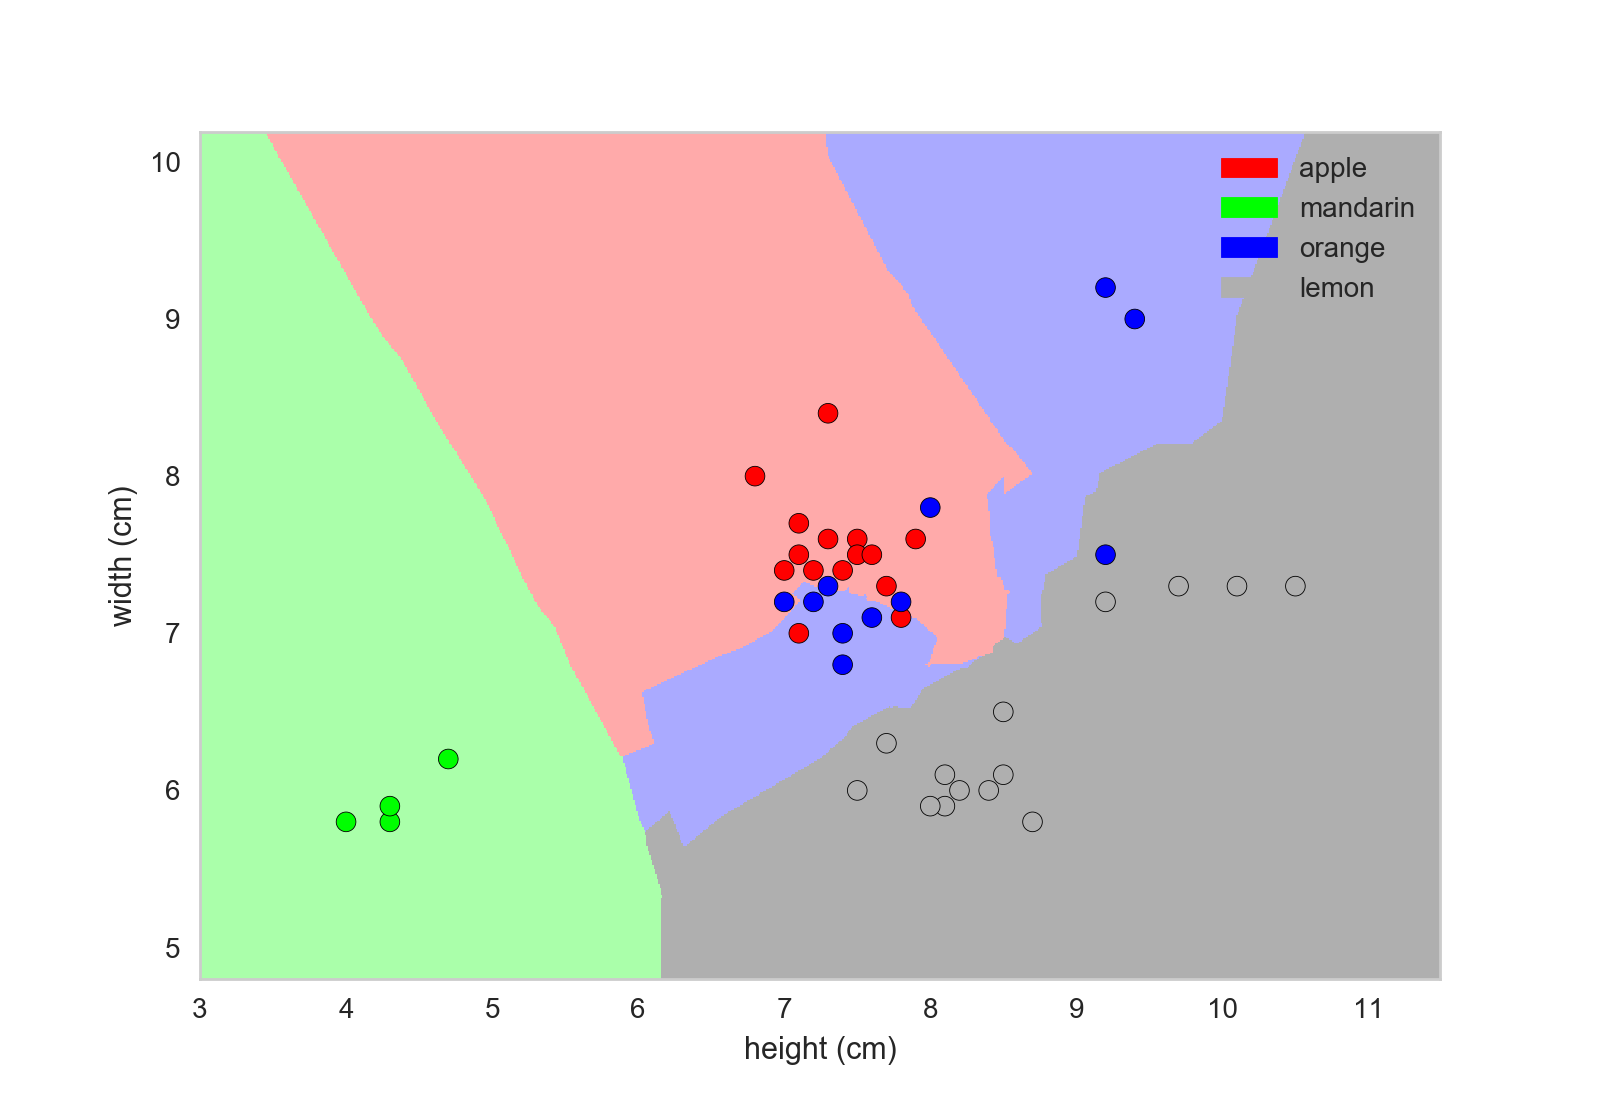

In [184]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<img src="KNN_explanation_5.png" alt="jupyter" style="width: 600px;"/> 

<IPython.core.display.Javascript object>


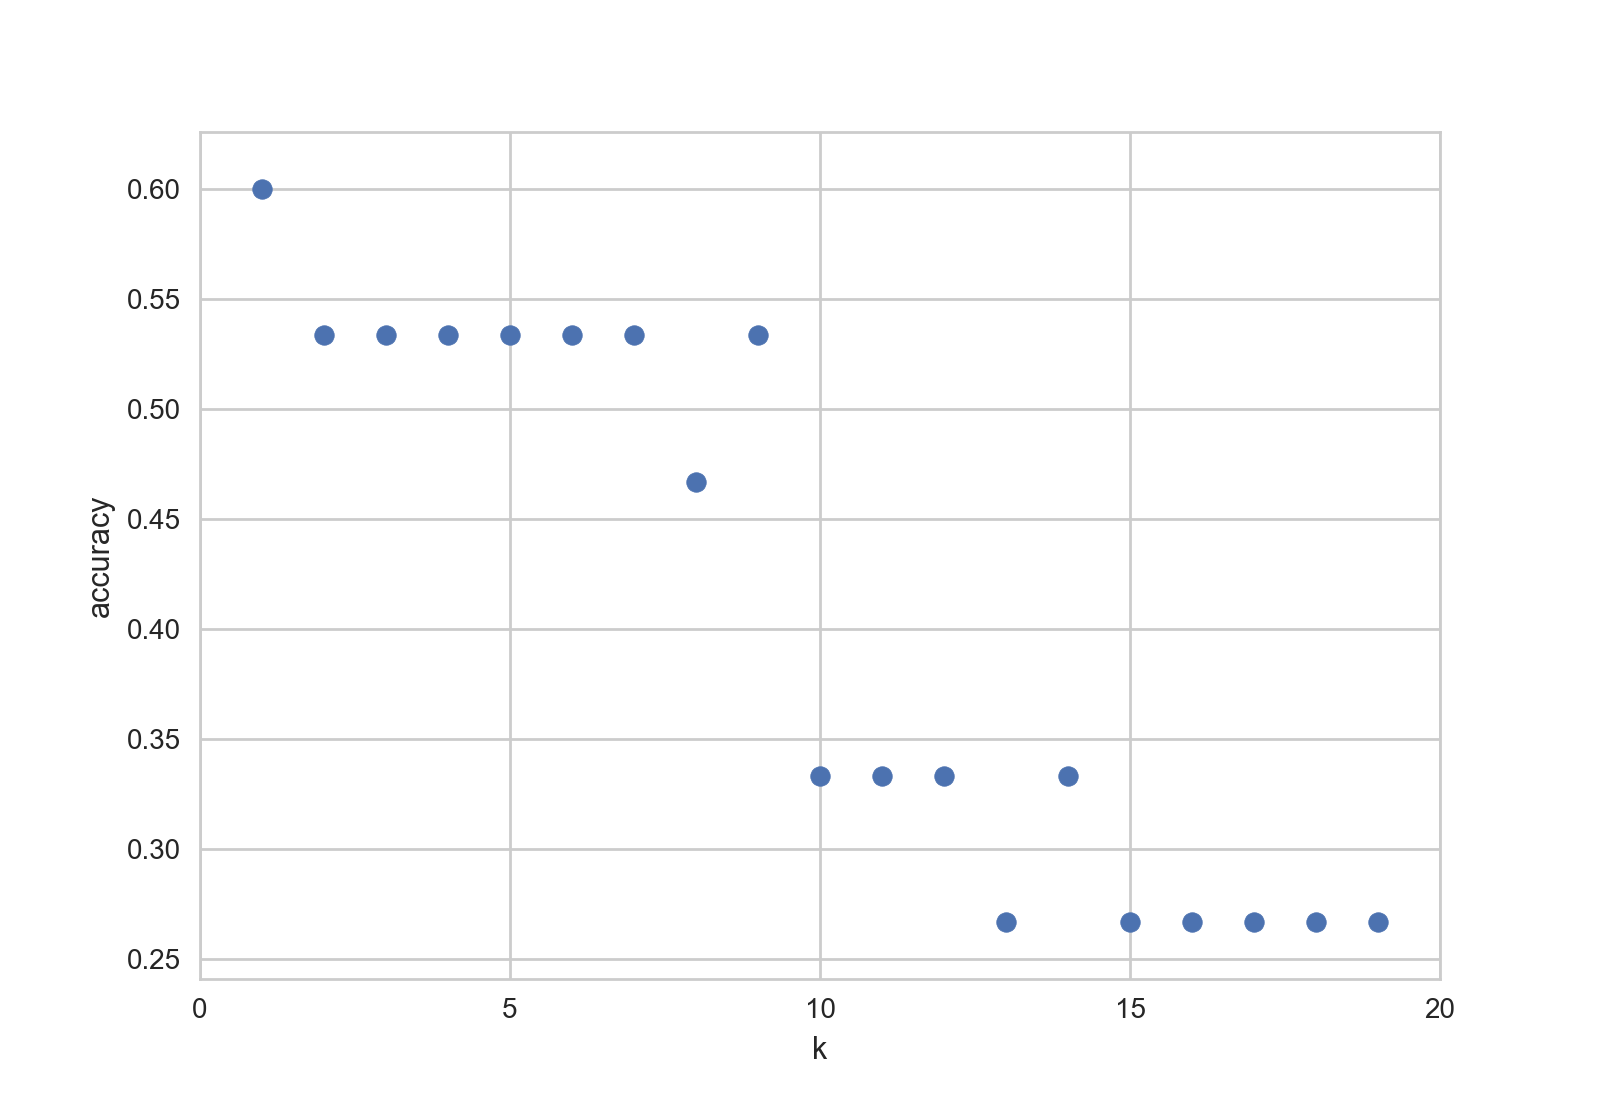

In [187]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

<a id="accur"></a> 
### How sensitive is k-NN classification accuracy to the train/test split proportion?
``train_test_split`` splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying ``random_state``, you will get a different result, this is expected behavior. Therefore, in the next plots we run 1000 examples with the same porportion of split and take the mean to see if we get a good behaviur regarding the data splitting within a proportion.

We can verify the results when we fix the ``train_test_split`` to 0, as we did at the beggining, see the secpnd plot.

<IPython.core.display.Javascript object>


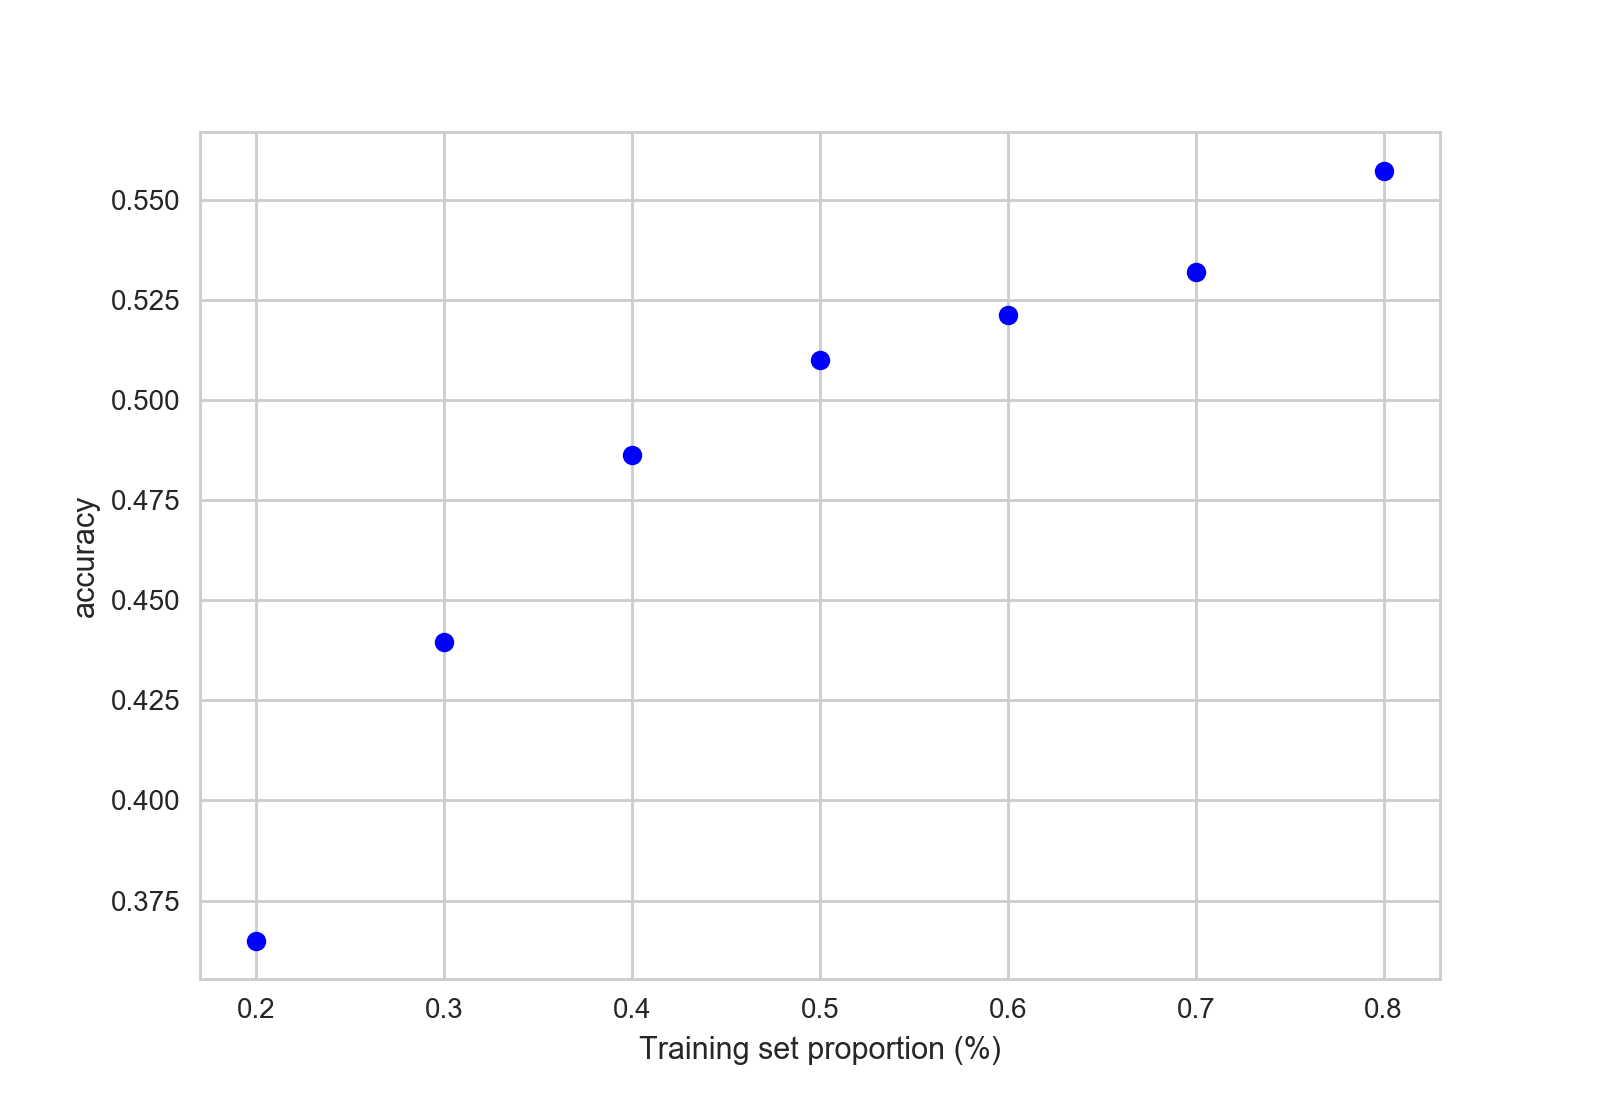

In [191]:
train_proportion = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in train_proportion:
    scores = []
    for i in range(1,1000):
        Xn_train, Xn_test, yn_train, yn_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(Xn_train, yn_train)
        scores.append(knn.score(Xn_test, yn_test))   
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In this case we can see how the mean value of the accurracy increases with a bigger split of the training set.

<IPython.core.display.Javascript object>


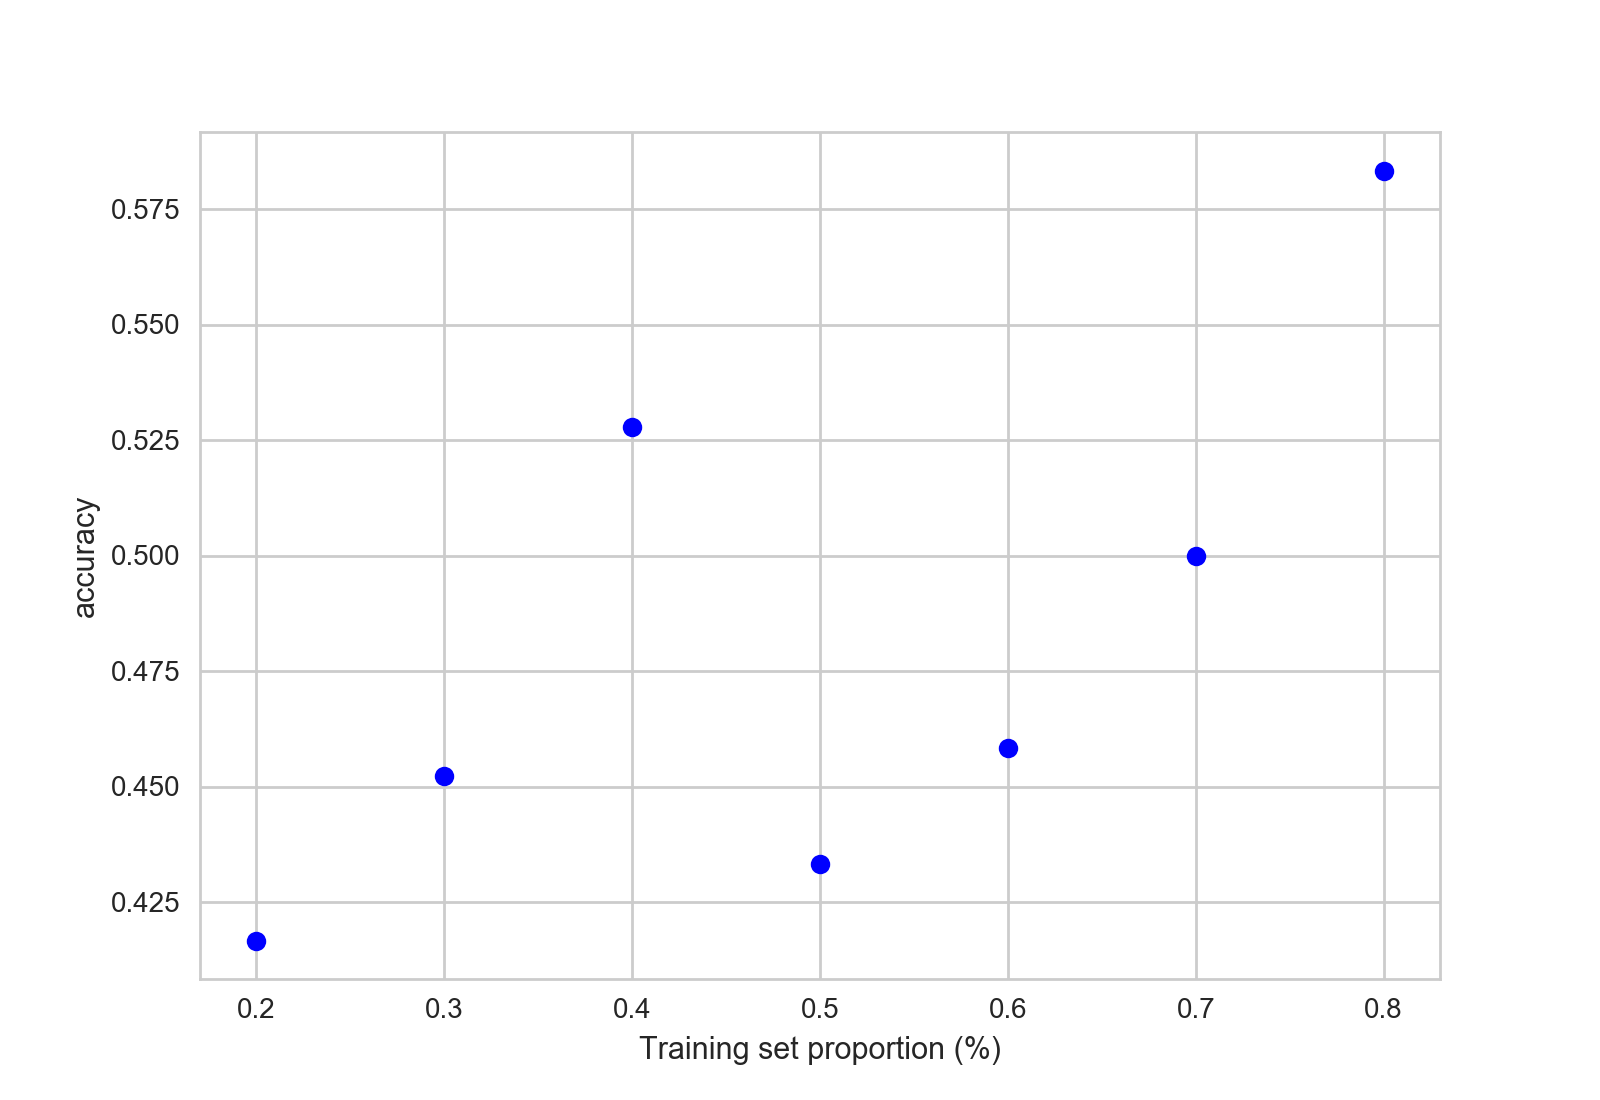

In [194]:
train_proportion = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in train_proportion:
    scores = []
    Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size = 1-s, random_state=0)
    knn.fit(Xs_train, ys_train)
    scores.append(knn.score(Xs_test, ys_test))

    plt.plot(s, scores, 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In the case of fixing the random split, we can have by chance a split that gives better accuracy, even with a small porportion of the training data. However, the tendency of iproving the accurracy with a given split is also observed (could be also possible that we gent less accurate results even we get a bigg split of the training data)

The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the [DistanceMetric](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html) class for a list of available metrics. We can check when using "euclidean" option, that we have the same resutls.

[Neighbors Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [27]:
knn_2 = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
knn_2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
predict_2 = knn_2.predict(X_test)
predict_2

array([3, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 1, 3, 1, 4])

In [31]:
print(accuracy_score(y_test, predict_2))

0.533333333333


# Notes:
This Nov. 2016 article by Zachary C. Lipton from the blog Approximately Correct discusses why and how automated processes for decision-making, particularly applications of machine learning, can exhibit bias in subtle and not-so-subtle ways. It's self-contained and includes a mini-review of machine learning concepts that reinforces what's covered in Module 1. This reading is optional for completion of the course.

http://approximatelycorrect.com/2016/11/07/the-foundations-of-algorithmic-bias/

If you're interested in the more general topic of ethics in data science, we recommend this online course in Data Science Ethics by Prof. H.V. Jagadish of the University of Michigan.

https://www.edx.org/course/data-science-ethics-michiganx-ds101x-1

## Resources

[Python Docs (for general Python documentation)](https://docs.python.org/3/)

[Python Classes Docs](https://docs.python.org/3.5/tutorial/classes.html)

[Scipy](http://scipy.org/)

[scitkit-learn Docs](http://scikit-learn.org/stable/documentation.html)

[scikit-learn Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)

Don't forget to check [Stack Overflow](https://stackoverflow.com/questions/tagged/scikit-learn) and [Cross Validated](https://stats.stackexchange.com/)!